In [52]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import io as new_io
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
import matplotlib

from PIL import Image

pylab.rcParams['figure.figsize'] = (10.0, 10.0)

### Load Images and Annotations

In [20]:
dataDir='/Users/franklinheng/Documents/H4D/new_seg_xview/val2014/'
annFile ='/Users/franklinheng/Documents/H4D/new_seg_xview/instances_val2014.json'

In [21]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!


### Get Number of Image IDs and Display Random Image (0, 20)

len img ids:  22026
len imgs:  22026


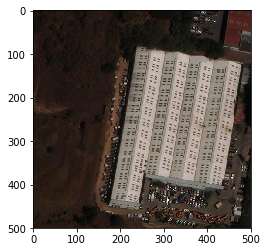

In [4]:
imgIds = coco.getImgIds()
print('len img ids: ', len(imgIds))

imgs = coco.loadImgs(imgIds)
print('len imgs: ', len(imgs))

# get random number 
img = imgs[np.random.randint(0, 20)]
I = io.imread(os.path.join(dataDir, img['file_name']))

plt.imshow(I)

### Display All Categories and The IDs 

In [5]:
c_ids = coco.loadCats(coco.getCatIds())
for c in c_ids: 
    print(c['name'], c['id'])
#nms=[cat['name'] for cat in cats]

Fixed-wing Aircraft 11
Small Aircraft 12
Cargo Plane 13
Helicopter 15
Passenger Vehicle 17
Small Car 18
Bus 19
Pickup Truck 20
Utility Truck 21
Truck 23
Cargo Truck 24
Truck w/Box 25
Truck Tractor 26
Trailer 27
Truck w/Flatbed 28
Truck w/Liquid 29
Crane Truck 32
Railway Vehicle 33
Passenger Car 34
Cargo Car 35
Flat Car 36
Tank car 37
Locomotive 38
Maritime Vessel 40
Motorboat 41
Sailboat 42
Tugboat 44
Barge 45
Fishing Vessel 47
Ferry 49
Yacht 50
Container Ship 51
Oil Tanker 52
Engineering Vehicle 53
Tower crane 54
Container Crane 55
Reach Stacker 56
Straddle Carrier 57
Mobile Crane 59
Dump Truck 60
Haul Truck 61
Scraper/Tractor 62
Front loader/Bulldozer 63
Excavator 64
Cement Mixer 65
Ground Grader 66
Hut/Tent 71
Shed 72
Building 73
Aircraft Hangar 74
Damaged Building 76
Facility 77
Construction Site 79
Vehicle Lot 83
Helipad 84
Storage Tank 86
Shipping container lot 89
Shipping Container 91
Pylon 93
Tower 94


### Display All Categories and Super IDs 

In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))
print(len(cats))

COCO categories: 
Fixed-wing Aircraft Small Aircraft Cargo Plane Helicopter Passenger Vehicle Small Car Bus Pickup Truck Utility Truck Truck Cargo Truck Truck w/Box Truck Tractor Trailer Truck w/Flatbed Truck w/Liquid Crane Truck Railway Vehicle Passenger Car Cargo Car Flat Car Tank car Locomotive Maritime Vessel Motorboat Sailboat Tugboat Barge Fishing Vessel Ferry Yacht Container Ship Oil Tanker Engineering Vehicle Tower crane Container Crane Reach Stacker Straddle Carrier Mobile Crane Dump Truck Haul Truck Scraper/Tractor Front loader/Bulldozer Excavator Cement Mixer Ground Grader Hut/Tent Shed Building Aircraft Hangar Damaged Building Facility Construction Site Vehicle Lot Helipad Storage Tank Shipping container lot Shipping Container Pylon Tower

COCO supercategories: 
Passenger Vehicle Railway Vehicle None Building Truck Maritime Vessel Fixed-wing Aircraft Engineering Vehicle
60


### Get Random Image That Contains A Specific Category ID

[18]
[{'license': 1, 'file_name': 'COCO_train2014_000000010073.jpeg', 'coco_url': '', 'width': 500, 'height': 500, 'date_captured': '2018-02-22 00:00:00', 'flickr_url': '', 'id': 10073}]


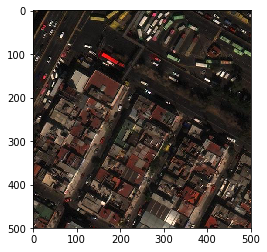

In [15]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['Small Car']);
print(catIds)

imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds)

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])
xview_image = io.imread(os.path.join(dataDir, img[0]['file_name']))

print(img)

plt.imshow(xview_image)

### Select Specific Image and Display The Bounding Boxes and Segmentation Masks 

In [24]:
def color_map(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap

def color_map_viz():
    ### intialize labels
    labels = ['Background', 
         'Fixed-wing Aircraft',
         'Small Aircraft',
         'Cargo Plane',
         'Helicopter',
         'Passenger Vehicle',
         'Small Car',
         'Bus',
         'Pickup Truck',
         'Utility Truck',
         'Truck',
         'Cargo Truck',
         'Truck w/Box',
         'Truck Tractor',
         'Trailer',
         'Truck w/Flatbed',
         'Truck w/Liquid',
         'Crane Truck',
         'Railway Vehicle',
         'Passenger Car',
         'Cargo Car',
         'Flat Car',
         'Tank car',
         'Locomotive',
         'Maritime Vessel',
         'Motorboat',
         'Sailboat',
         'Tugboat',
         'Barge',
         'Fishing Vessel',
         'Ferry',
         'Yacht',
         'Container Ship',
         'Oil Tanker',
         'Engineering Vehicle',
         'Tower crane',
         'Container Crane',
         'Reach Stacker',
         'Straddle Carrier',
         'Mobile Crane',
         'Dump Truck',
         'Haul Truck',
         'Scraper/Tractor',
         'Front loader/Bulldozer',
         'Excavator',
         'Cement Mixer',
         'Ground Grader',
         'Hut/Tent',
         'Shed',
         'Building',
         'Aircraft Hangar',
         'Damaged Building',
         'Facility',
         'Construction Site',
         'Vehicle Lot',
         'Helipad',
         'Storage Tank',
         'Shipping container lot',
         'Shipping Container',
         'Pylon',
         'Tower']
    
    ### intialize values 
    nclasses = 61
    row_size = 50
    col_size = 500
    c2c_dic = {}
    
    cmap = color_map()
    array = np.empty((row_size*(nclasses+1), col_size, cmap.shape[1]), dtype=cmap.dtype)
    for i in range(nclasses):
        array[i*row_size:i*row_size+row_size, :] = cmap[i]
        c2c_dic[labels[i]] = cmap[i]
    return c2c_dic

In [25]:
# get colormap and convert to array 
c2c_dic = color_map_viz()
palettes = np.asarray([i for i in c2c_dic.values()])

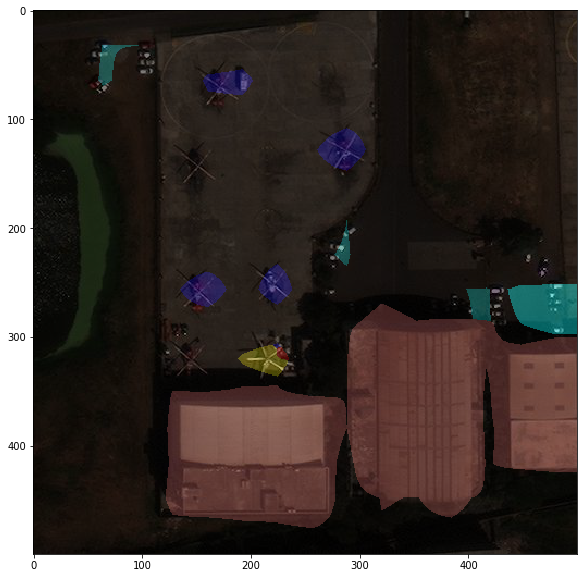

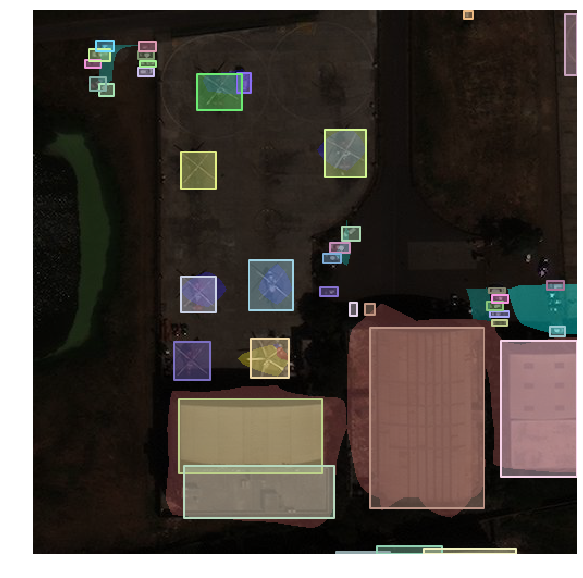

In [74]:
# load and display image
img_id = 2518

# segmentation directory
seg_img_path = '/Users/franklinheng/Documents/new_seg_imgs/' + str(img_id) + '.png'

# get segmentation
seg = Image.open(seg_img_path)
seg = np.asarray(seg)
seg_img = Image.fromarray(palettes[seg])

# get original image 
imgIds = coco.getImgIds()
imgs = coco.loadImgs(imgIds)
img = imgs[img_id]
I = io.imread(os.path.join(dataDir, img['file_name']))

# overlay segmentation
plt.figure(1)
plt.imshow(I)
plt.imshow(seg_img, cmap='jet', alpha=0.5)

# Display instance annotations
plt.figure(2)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

# overlay segmentation
plt.imshow(seg_img, cmap='jet', alpha=0.5)